In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

import gc  # For garbage collection
import itertools


from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



In [2]:
model = IHANKModelClass()
save_figs = True
shock = calculations.difine_shocks(model, scale=0.3, rho = 0.8)[0]
T_max_ = 20

In [11]:
model_NH = IHANKModelClass(name='Baseline-Homothetic')
model_NH.par.epsilon = 0.18
model_NH.par.gamma = 0.25

# model_NH.par.gamma = model_NH.par.epsilon
model_NH.find_ss()
model_NH.compute_jacs(do_print=True)
model_NH.find_transition_path(shocks=shock, do_end_check=False, do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for inc_NT          in 1.1 secs
curly_Y and curly_D calculated for inc_TH          in 1.0 secs
curly_Y and curly_D calculated for n_NT            in 1.0 secs
curly_Y and curly_D calculated for n_TH            in 0.9 secs
curly_Y and curly_D calculated for p               in 1.0 secs
curly_Y and curly_D calculated for ra              in 1.0 secs
curly_E calculated in 0.5 secs
builiding blocks combined in 2.6 secs
household Jacobian computed in 9.1 secs

full Jacobians:
full Jacobian to unknowns computed in 24.4 secs [in evaluate_blocks(): 20.8 secs]
full Jacobian to shocks computed in 6.9 secs [in evaluate_blocks(): 3.1 secs]
finding the transition path:
 it =   0 -> max. abs. error = 2.52e-02
   3.50e-03 in NKWCT_res
   3.50e-03 in NKWCNT_res
   6.10e-03 in clearing_YTH
   8.01e-03 in clearing_YNT
   2.52e-02 in UIP_res
   0.00e+00 in NKPCT_res
   0.00e+00 in NKPCNT_res
 it =

In [ ]:
model_Homo_eta = IHANKModelClass(name='Homothetic')
# model_Homo_eta.par.epsilon = 0.18
model_Homo_eta.par.gamma = 0.12
model_Homo_eta.par.epsilon = 0.0

# model_Homo_eta.par.gamma = model_Homo_eta.par.epsilon
model_Homo_eta.find_ss()
model_Homo_eta.compute_jacs(do_print=False)
model_Homo_eta.find_transition_path(shocks=shock, do_end_check=False)

In [3]:
model_CD = IHANKModelClass(name='Cubb-Douglas')
# model_CD.par.epsilon = 0.18
model_CD.par.gamma = 0.0
model_CD.par.epsilon = 0.0

model_CD.find_ss()
model_CD.compute_jacs(do_print=False)
model_CD.find_transition_path(shocks=shock, do_end_check=False)

In [16]:
models = [model_NH, model_CD]

In [ ]:
fig = figs.show_IRFs(models)


# Basics

In [ ]:
fig = figs.plot_policy(model_baseline, ['e', 'cnt', 'ct'])
if save_figs: fig.savefig('plots/policy.png', dpi=300, bbox_inches='tight')


In [ ]:
fig = figs.cum_z_a(model_baseline)
if save_figs: fig.savefig('plots/cum_z_a.png', dpi=300, bbox_inches='tight')


In [ ]:
fig = figs.plot_trans_matrix(model_baseline)
if save_figs: fig.savefig('plots/z_trans.png', dpi=300, bbox_inches='tight')

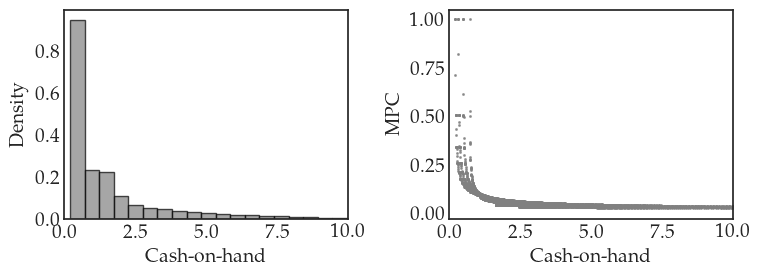

In [50]:

fig = figs.show_coh_and_mpc(model_NH)
if save_figs: fig.savefig('plots/coh_MPC.png', dpi=300, bbox_inches='tight')

# Shock 


In [ ]:
fig = figs.plot_PE_s(model_CD)
if save_figs: fig.savefig('plots/PE_shock.png', dpi=300, bbox_inches='tight')

# Jacobians 

In [ ]:
fig = figs.plot_jac_p(models)
if save_figs: fig.savefig('plots/jac_p.png', dpi=300, bbox_inches='tight')

# IRF's

### All

In [7]:
save_figs = False

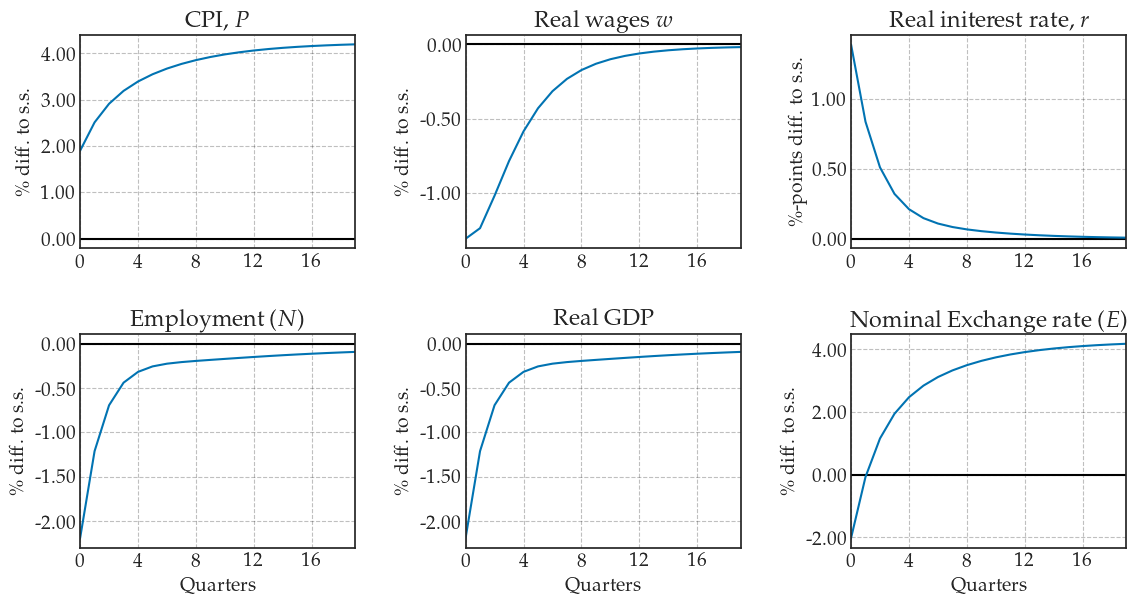

In [8]:
# paths_ = ['PE', 'P', 'DomP', 'W',  'w', 'r', 'N', 'CE', 'X' , 'YH', ]
paths_ = paths_ = ['P',   'w', 'r_real', 'N', 'YH', 'E']
fig = figs.show_IRFs([model_CD], paths_, T_max=T_max_)
if save_figs: fig.savefig('plots/MAIN_CB.png', dpi=300, bbox_inches='tight')

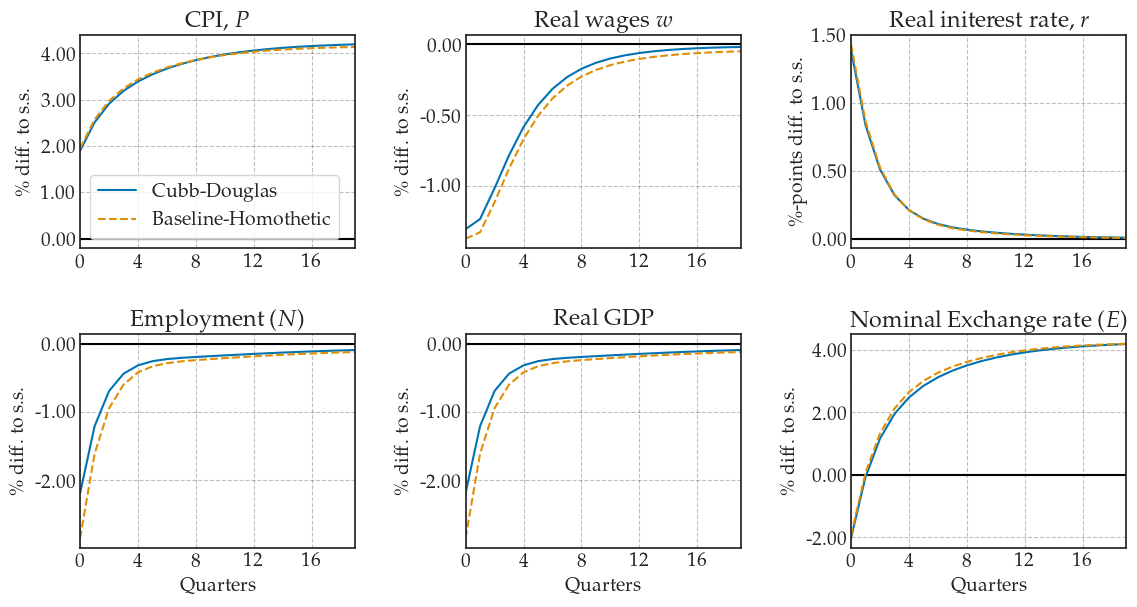

In [13]:
paths_ = ['P',   'w', 'r_real', 'N', 'YH', 'E']

fig = figs.show_IRFs([model_CD, model_NH], paths_, T_max=T_max_)

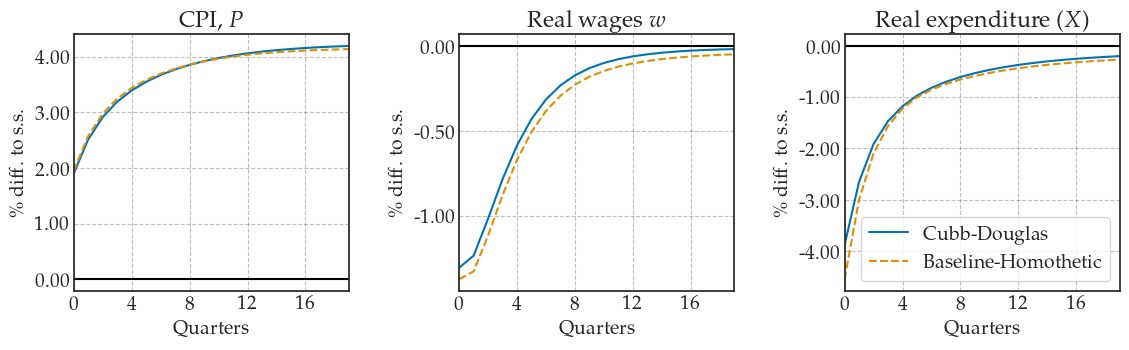

In [12]:
models = [model_CD, model_NH]

paths_ = ['P', 'w', 'X']
fig = figs.show_IRFs(models, paths_, T_max=T_max_, legend_window=2)
if save_figs: fig.savefig('plots/MAIN_compare.png', dpi=300, bbox_inches='tight')

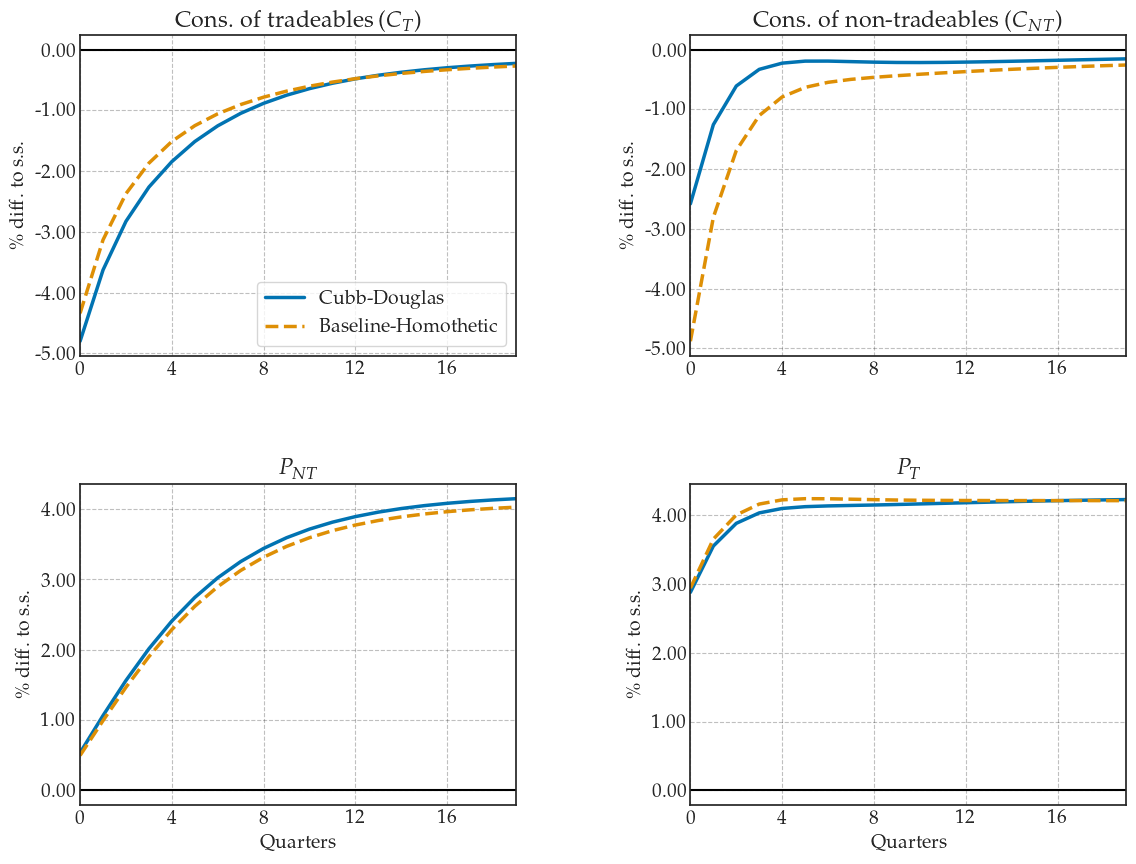

In [14]:

paths_ = ['CT_hh', 'CNT_hh', 'PNT', 'PT']
fig =  figs.show_IRFs(models, paths_, maxcol=2, T_max=T_max_, lwidth=2.5)
if save_figs: fig.savefig(f'plots/Consupmtion_T_NT.png', dpi=300, bbox_inches='tight')

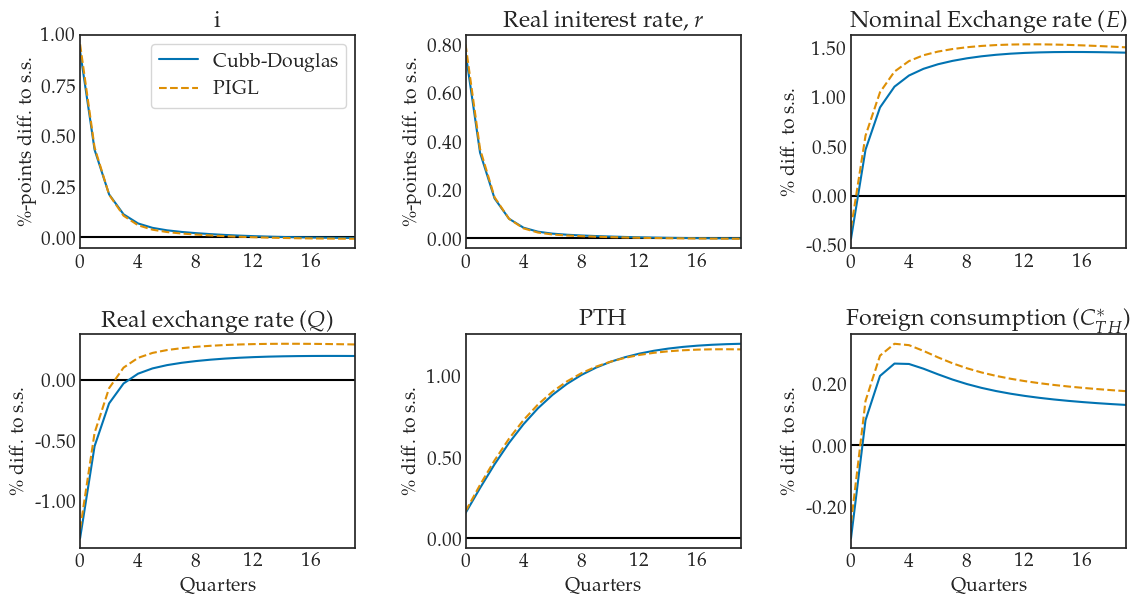

In [11]:
model_NH.name = 'PIGL'
paths_forigne = ['i', 'r_real', 'E', 'Q', 'PTH', 'CTH_s' ]
fig = figs.show_IRFs([model_CD, model_NH], paths_forigne)
if save_figs: fig.savefig('plots/forigne_compare.png', dpi=300, bbox_inches='tight')

### IRF's prices

In [ ]:
fig =  figs.show_pc_IRFs(model_CD)
if save_figs: fig.savefig(f'plots/prices_cons_CD.png', dpi=300, bbox_inches='tight')

In [ ]:
fig =  figs.show_pc_IRFs(model_NH)
if save_figs: fig.savefig(f'plots/prices_cons_NH.png', dpi=300, bbox_inches='tight')

In [ ]:

# fig =  figs.show_pc_IRFs(model_baseline)
# if save_figs: fig.savefig(f'plots/IRFs_pc_all.png', dpi=300, bbox_inches='tight')



# fig =  figs.show_price_IRFs(model_baseline)
# if save_figs: fig.savefig(f'plots/IRFs_p_all.png', dpi=300, bbox_inches='tight')



# fig =  figs.show_c_IRFs(model_baseline)
# if save_figs: fig.savefig(f'plots/IRFs_c_all.png', dpi=300, bbox_inches='tight')

# Importance of epsilon 

In [ ]:
model_e1 = IHANKModelClass(name='epsion = 0.10')
model_e1.par.epsilon = 0.10
# model_e1.par.gamma = 0.24
model_e1.find_ss()
model_e1.compute_jacs()
model_e1.find_transition_path(shocks=shock, do_end_check=False)

model_e05 = IHANKModelClass(name='epsion = 0.05')
model_e05.par.epsilon = 0.05
# model_e05.par.gamma = 0.21
model_e05.find_ss()
model_e05.compute_jacs()
model_e05.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
model_e00 = IHANKModelClass(name='epsion = 0.00')
model_e00.par.epsilon = 0.00
# model_e00.par.gamma = 0.21
model_e00.find_ss()
model_e00.compute_jacs()
model_e00.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
models = [model_baseline,  model_e1, model_e05 , model_e00]#, model_homothetic]
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'cov = {model_i.cov_e_omegaT:.3f}'
    
colors_reds = sns.color_palette("Reds", n_colors=5)
fig = figs.show_IRFs(models, paths=['P', 'X', 'CT', 'CNT' ], colors = colors_reds, maxcol=2)
# if save_figs: fig.savefig('plots/IRFs_epsion.png', dpi=300, bbox_inches='tight')

In [ ]:

def show_IRFs(models, colors):

    ncols = 2
    nrows = 2
    T_max = 17
    linewidth= 1.0

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # Tradable and  non-tradable
    # fig.suptitle(f'{model[0].name}, Consumption Response', fontsize=20)
    
    ax = fig.add_subplot(nrows,ncols,1)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.P-model.ss.P)/model.ss.P-1)*100,label='$C_T$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('CPI (P)')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,2)    
    for model in models: 
        ax.plot(((model.path.X-model.ss.X)/model.ss.X-1),label='$C_E$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Real Expenditure')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))
    
    ax = fig.add_subplot(nrows,ncols,3)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.CT-model.ss.CT)/model.ss.CT-1),label='$C_T$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('Cons. Tradable goods')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,4)    
    for model in models: 
        ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT-1)*100,label='$C_E$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Cons. Non-tradable services')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))


    fig.tight_layout()

    return fig

colors_reds = sns.color_palette("Reds", n_colors=4)
models = [model_baseline, model_homothetic]
fig = show_IRFs(models, colors_reds)


# Importance of gamma

In [ ]:
fig = figs.plot_eta_T_RA_vs_gamma()
if save_figs: fig.savefig('plots/eta_T_RA_vs_gamma.png', dpi=300, bbox_inches='tight')

In [ ]:
model_g1 = IHANKModelClass(name='$\gamma = 0.1$')
model_g1.par.epsilon = 0.0
model_g1.par.gamma = 0.10
model_g1.find_ss()
model_g1.compute_jacs()
model_g1.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
model_g2 = IHANKModelClass(name='$\gamma = 0.2$')
model_g2.par.epsilon = 0.0
model_g2.par.gamma = 0.20
model_g2.find_ss()
model_g2.compute_jacs()
model_g2.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
model_g25 = IHANKModelClass(name='$\gamma = 0.25$')
model_g25.par.epsilon = 0.0
model_g25.par.gamma = 0.25
model_g25.find_ss()
model_g25.compute_jacs()
model_g25.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
model_g3 = IHANKModelClass(name='$\gamma = 0.3$')
model_g3.par.epsilon = 0.0
model_g3.par.gamma = 0.3
model_g3.find_ss()
model_g3.compute_jacs()
model_g3.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
model_CD.name = '$\gamma = 0.0$'

models = [model_CD,  model_g2,   model_g3]
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'$\eta_T$ = {model_i.par.eta_T_RA:.2f}'
    
colors_reds = sns.color_palette("Reds", n_colors=4)
path_eta = ['CT', 'CNT', 'X'] 


fig = figs.show_IRFs(models, path_eta, maxcol=3)
if save_figs: fig.savefig('plots/gamma_CD.png', dpi=300, bbox_inches='tight')

# Effect of real wage stabilisation motive 

### Results 

In [ ]:
model_no_ws_CD = IHANKModelClass(name='$\zeta = 0$')
# model_no_ws_CD.par.real_wage_motive = 0.0
# model_no_ws_CD.par.epsilon = 0.0
# model_no_ws_CD.par.gamma = 0.0

model_no_ws_CD.find_ss()
model_no_ws_CD.compute_jacs()
model_no_ws_CD.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
model_no_ws_PIGL = IHANKModelClass(name='PIGL $\zeta = 0$')
model_no_ws_PIGL.par.real_wage_motive = 0.0
model_no_ws_PIGL.par.mon_policy = 'taylor'

model_no_ws_PIGL.find_ss()
model_no_ws_PIGL.compute_jacs()
model_no_ws_PIGL.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
paths_wage_stabilisation = ['P', 'W']
model_CD.name = '$\zeta = 5.0$'


fig = figs.show_IRFs([model_no_ws_CD,  model_no_ws_PIGL], paths_wage_stabilisation, T_max=50, legend_window=1)

# if save_figs: fig.savefig('plots/wp_spiral.png', dpi=300, bbox_inches='tight')

### IRFs robustness

In [ ]:
model_no_ws_homo = IHANKModelClass(name='$\zeta = 0 Homo$')
model_no_ws_homo.par.real_wage_motive = 0.0
model_no_ws_homo.par.epsilon = 0.0
model_no_ws_homo.par.gamma = 0.18
model_no_ws_homo.find_ss()
model_no_ws_homo.compute_jacs()
model_no_ws_homo.find_transition_path(shocks=shock, do_end_check=False)

# Consumption

### Goods and services

# Correlations

In [ ]:
# model_baseline.calc_additional_new()
model_CD.calc_additional_new()
fig = figs.plot_cor_e(model_CD)
# if save_figs: fig.savefig('plots/cor_e.png', dpi=300, bbox_inches='tight')

# Forigne economy 

In [ ]:

paths_forigne = ['i', 'r_real', 'E', 'Q', 'PTH', 'CTH_s' ]
fig = figs.show_IRFs(models, paths_forigne)
if save_figs: fig.savefig('plots/IRFs_forigne.png', dpi=300, bbox_inches='tight')

# No wage stabilisation motive

# Other elasticities of substitution

### Eta E

In [ ]:
model_etaE05 = IHANKModelClass(name= '$\eta_E = 0.5$')
model_etaE05.par.epsilon = 0.0
model_etaE05.par.gamma = 0.0

model_etaE05.par.etaE = 0.5
model_etaE05.find_ss()
model_etaE05.compute_jacs()
model_etaE05.find_transition_path(shock, do_end_check=False)

In [4]:
model_etaE2 = IHANKModelClass(name= '$\eta_E = 2.0$')
model_etaE2.par.epsilon = 0.0
model_etaE2.par.gamma = 0.0
model_etaE2.par.etaE = 2.0
model_etaE2.find_ss()
model_etaE2.compute_jacs()
model_etaE2.find_transition_path(shock, do_end_check=False)


In [5]:
model_etaE5 = IHANKModelClass(name= '$\eta_E = 5.0$')
model_etaE5.par.epsilon = 0.0
model_etaE5.par.gamma = 0.0

model_etaE5.par.etaE = 5.0
model_etaE5.find_ss()
model_etaE5.compute_jacs()
model_etaE5.find_transition_path(shock, do_end_check=False)


KeyboardInterrupt: 

In [ ]:
model_etaE10 = IHANKModelClass(name= '$\eta_E = 10.0$')
model_etaE10.par.epsilon = 0.0
model_etaE10.par.gamma = 0.0

model_etaE10.par.etaE = 10.0
model_etaE10.find_ss()
model_etaE10.compute_jacs()
model_etaE10.find_transition_path(shock, do_end_check=False)


In [ ]:
save_figs = True

In [ ]:
model_CD.name = '$\eta_E =0.1$'

models = [model_CD , model_etaE2, model_etaE5]

paths_ = ['CE','YH', 'X']

fig = figs.show_IRFs(models, paths_, legend_window=0)
if save_figs: fig.savefig('plots/eta_E_CD.png', dpi=300, bbox_inches='tight')

### Eta F and eta S 

In [ ]:
model_etaF1 = IHANKModelClass(name= 'Eta = 1.0')
model_etaF1.par.etaF = 1.0
model_etaF1.par.eta_s = 1.0
model_etaF1.find_ss()
model_etaF1.compute_jacs()
model_etaF1.find_transition_path(shock, do_end_check=False)

In [ ]:
model_etaF2 = IHANKModelClass(name= 'Eta = 2.0')
model_etaF2.par.etaF = 2.0
model_etaF2.par.eta_s = 2.0
model_etaF2.find_ss()
model_etaF2.compute_jacs()
model_etaF2.find_transition_path(shock, do_end_check=False)

In [ ]:
model_etaF5 = IHANKModelClass(name= 'Eta = 3.0')
model_etaF5.par.etaF = 3.0
model_etaF5.par.eta_s = 3.0
model_etaF5.find_ss()
model_etaF5.compute_jacs()
model_etaF5.find_transition_path(shock, do_end_check=False)

In [ ]:
model_baseline.name = 'Eta = 0.5'
models = [model_baseline, model_etaF1 , model_etaF2, model_etaF5]

paths_ = ['PTH', 'E', 'PTH_s', 'CTH', 'CTF', 'CTH_s' , 'X', 'PF']
# paths_ = [ 'CTH', 'CTF', 'CTH_s' , 'X']
fig = figs.show_IRFs(models, paths_)
# if save_figs: fig.savefig('plots/eta_F.png', dpi=300, bbox_inches='tight')

# Energy share

In [ ]:
# High energy 
model_EHigh = IHANKModelClass(name = 'High Energy')
model_EHigh.par.alphaE = model_baseline.par.alphaE *2
model_EHigh.find_ss()
model_EHigh.compute_jacs()
model_EHigh.find_transition_path(shock, do_end_check=False)


# High energy 
model_ELow = IHANKModelClass(name = 'Low Energy')
model_ELow.par.alphaE = model_baseline.par.alphaE /2
model_ELow.find_ss()
model_ELow.compute_jacs()
model_ELow.find_transition_path(shock, do_end_check=False)

In [ ]:
paths = []
fig = figs.show_IRFs([model_ELow,model_baseline, model_EHigh])
if save_figs: fig.savefig('plots/eta_F.png', dpi=300, bbox_inches='tight')

# Monetary Policy

In [ ]:
model_tight = IHANKModelClass(name='Tight mon policy')
model_tight.par.phi = 2.0
model_tight.find_ss()
model_tight.compute_jacs()
model_tight.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
# In notbook_complete2 copy
# hh_state_basline 
fig = figs.show_IRFs([model, model_tight])

# State dependence

In [ ]:
state_X_CD, state_X_CD_NH, state_CNT_CT_CD_CNT = figs.show_states(model_CD, shock, model_alt=model_NH, T_max=20)


state_X_CD.savefig('plots/state_X_CD.png', dpi=300, bbox_inches='tight')
state_X_CD_NH.savefig('plots/state_X_CD_NH.png', dpi=300, bbox_inches='tight')
state_CNT_CT_CD_CNT.savefig('plots/state_CNT_CT_CD_CNT.png', dpi=300, bbox_inches='tight')


# Different prices

In [ ]:
fig = figs.show_coh_and_mpc()

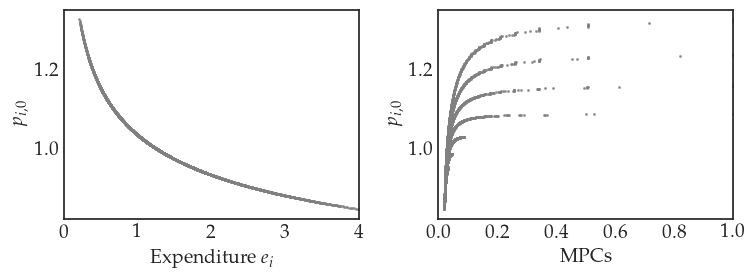

In [6]:
fig = figs.show_pi(model_NH)
if save_figs: fig.savefig('plots/pi_MPC.png', dpi=300, bbox_inches='tight')